In [1]:
import numpy as np
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt

from project_utils import fig_utils as figu

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
def parse_kt_jsons(project_path):
    files = glob.glob(project_path+"/*/trial.json", recursive=True)
    j = open(files[0])
    x = json.load(j)

    df = pd.DataFrame(columns = ['trial_id', 'score']+list(x['hyperparameters']['values'].keys()))
    
    for f in files:
        j = open(f)
        x = json.load(j)
        df.loc[len(df.index)] = [x['trial_id'], x['score']]+list(x['hyperparameters']['values'].values())
    
    return(df)

In [4]:
figu.set_plt_rc_params()
plt.rc('axes', titlesize=7)     # fontsize of the axes titles (i.e. title of each panel)
plt.rc('axes', labelsize=7)    # fontsize of the x and y axis labels
plt.rc('xtick', labelsize=6)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=7)    # fontsize of the y tick labels
plt.rc('legend', fontsize=7)
plt.rc('legend', title_fontsize=7)

In [5]:
plt.rcParams['figure.dpi'] = 150

In [6]:
point_lats = [47.5, 2.5, -62.5, 57.5, -37.5]
point_lons = [172.5, 192.5, 242.5, 332.5, 42.5]

/Users/fvdav22/Documents/research/multiyear-prediction/envs/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/fvdav22/Documents/research/multiyear-prediction/envs/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/fvdav22/Documents/research/multiyear-prediction/envs/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/fvdav22/Documents/research/multiyear-prediction/envs/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/fvdav22/Documents/research/multiyear-prediction/envs/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/fvdav22/Documents/research/mul

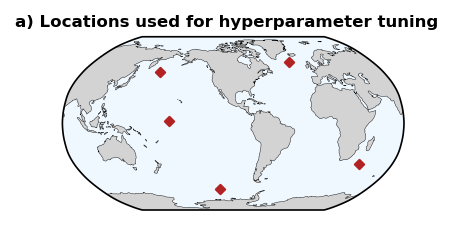

In [7]:
fig, ax = plt.subplots(figsize = (3.5, 1.5), ncols = 1, nrows = 1, 
                   subplot_kw={'projection': ccrs.Robinson(central_longitude = 260)})
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor = 'lightgray')
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth = 0.2)
ax.scatter(point_lons, point_lats, transform = ccrs.PlateCarree(), marker = "D", s = 10, c = "firebrick")
ax.set_facecolor("aliceblue")
ax.set_global()
plt.suptitle("a) Locations used for hyperparameter tuning", size = 8, fontweight="bold")
plt.savefig("../figures/Fig_S1a_hp_tuning_map.pdf")

### Keras Tuner Results - testing Learning Rate

selected learning rate = 0.0003 (starting learning rate for scheduler)

In [8]:
location_labels = ["North Pacific\n(47.5N, 172.5E)", "Tropical Pacific\n(2.5N, 167.5W)", "Southern Ocean\n(67.5S, 117.5W)",
                   "North Atlantic\n(57.5N, 27.5W)", "SW Indian Ocean\n(37.5S, 42.5E)"] 

In [9]:
kt_lr_results = []
for lat, lon in zip(point_lats, point_lons): 
    kt_lr_results.append(parse_kt_jsons("../processed_data/kt_results/kt_lr/kt_60mo_MPI-ESM1-2-LR_"+str(lat)+"_"+str(lon)).sort_values(by=['learning_rate']))

In [10]:
lr_choice = 0.0003

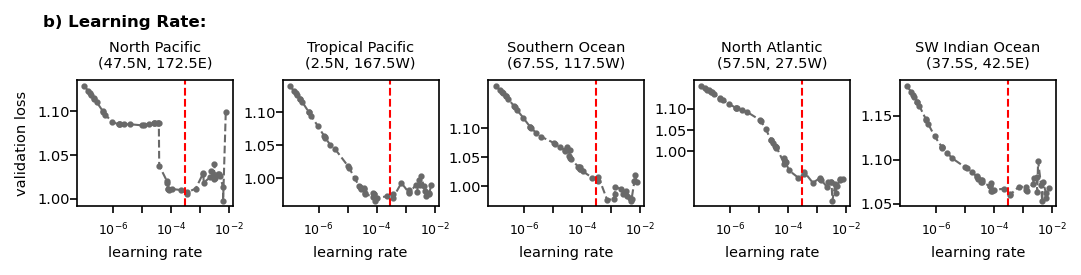

In [11]:
fig, axes = plt.subplots(1, 5, figsize = (7.5, 1.75))

for i, df in enumerate(kt_lr_results):
    axes[i].plot(df.learning_rate, df.score, c = "dimgray", marker = "o", linestyle = "dashed", markersize = 2)
    axes[i].axvline(lr_choice, c = "red", linestyle = 'dashed')
    axes[i].set_xscale("log")
    axes[i].set_xticks([1e-6, 1e-5, 0.0001, 0.001, 0.01],["$10^{-6}$", "", "$10^{-4}$", "",  "$10^{-2}$"])
    axes[i].set(xlabel = "learning rate")
    axes[i].set_title(location_labels[i], size = 7)
    axes[i].tick_params(axis='y', which='major', pad=0)
    if i == 0:
        axes[i].set(ylabel = "validation loss")
    if i in [1, 2, 3]:
        axes[i].set_yticks([1.0, 1.05, 1.1])
        
plt.subplots_adjust(wspace=0.32, top = 0.7, bottom = 0.22, left = 0.08, right = 0.95)
plt.suptitle("b) Learning Rate:", x = 0.05, ha = "left", y = 0.95, size = 8, fontweight="bold")
plt.savefig("../figures/Fig_S1b_hp_tuning_learning_rate.pdf")

### Keras Tuner Results - testing Dense Architecture

In [12]:
kt_arch1_results = []
for lat, lon in zip(point_lats, point_lons): 
    kt_arch1_results.append(parse_kt_jsons("../processed_data/kt_results/kt_arch1/kt_60mo_MPI-ESM1-2-LR_"+str(lat)+"_"+str(lon)).sort_values(by=['n_neurons']))

In [13]:
neuron_choice = 32
layer_choice = 1
layer_markers = ['o', 'v', '*']

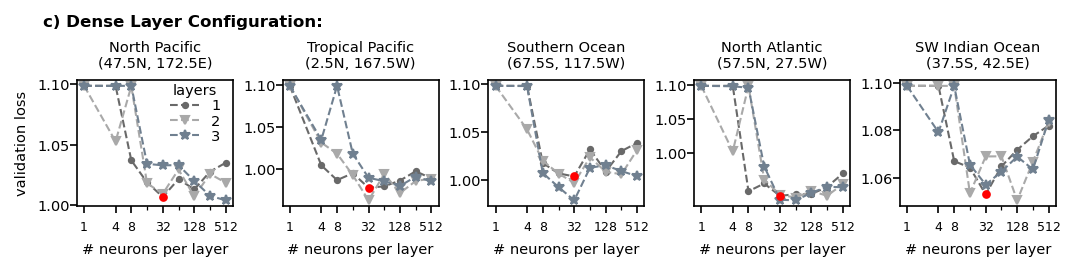

In [14]:
fig, axes = plt.subplots(1, 5, figsize = (7.5, 1.75))

for i, df in enumerate(kt_arch1_results):
    axes[i].plot(df.loc[df.n_dense_layers == 1].n_neurons, df.loc[df.n_dense_layers == 1].score, 
                 c = "dimgray", marker = layer_markers[0], linestyle='dashed', label = "1", markersize = 2.5)
    axes[i].plot(df.loc[df.n_dense_layers == 2].n_neurons, df.loc[df.n_dense_layers == 2].score, 
                 c = "darkgray", marker = layer_markers[1], linestyle='dashed', label = "2", markersize = 4)
    axes[i].plot(df.loc[df.n_dense_layers == 3].n_neurons, df.loc[df.n_dense_layers == 3].score, 
                 c = "slategray", marker = layer_markers[2], linestyle='dashed', label = "3", markersize = 5)
    axes[i].scatter(df.loc[(df.n_dense_layers == layer_choice) & (df.n_neurons == neuron_choice)].n_neurons, 
             df.loc[(df.n_dense_layers == layer_choice) & (df.n_neurons == neuron_choice)].score, c = "red", s = 10, marker = layer_markers[layer_choice-1], zorder=10)
    axes[i].set_xscale("log")
    axes[i].set_xticks([1, 4, 8, 32, 128, 512], [1, 4, 8, 32, 128, 512])
    axes[i].set_xticks([16, 64, 256], minor=True)
    axes[i].set(xlabel = "# neurons per layer")
    axes[i].set_title(location_labels[i], size = 7)
    axes[i].tick_params(axis='y', which='major', pad=0)
    if i == 0:
        axes[i].legend(frameon=False, title = "layers", labelspacing=0.1, loc = (0.56, .45))
        axes[i].set(ylabel = "validation loss")
    if i in [1,3]:
        axes[i].set_yticks([1.0, 1.05, 1.1])

plt.subplots_adjust(wspace=0.32, top = 0.70, bottom = 0.22, left = 0.08, right = 0.95)
plt.suptitle("c) Dense Layer Configuration:", x = 0.05, ha = "left", y = 0.95, size = 8, fontweight="bold")
plt.savefig("../figures/Fig_S1c_hp_tuning_dense.pdf")

### Keras Tuner Results - testing Conv Architecture


In [15]:
kt_arch2_results = []
for lat, lon in zip(point_lats, point_lons): 
    kt_arch2_results.append(parse_kt_jsons("../processed_data/kt_results/kt_arch2/kt_60mo_MPI-ESM1-2-LR_"+str(lat)+"_"+str(lon)).sort_values(by=['n_filters']))

In [16]:
layer_markers = ['o', 'v', '*']

In [17]:
filter_choice = 16
block_choice = 3

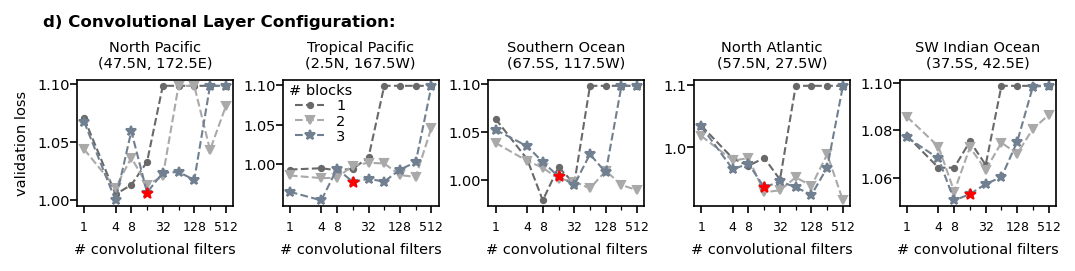

In [18]:
fig, axes = plt.subplots(1, 5, figsize = (7.5, 1.75))

for i, df in enumerate(kt_arch2_results):
    axes[i].plot(df.loc[df.n_conv_blocks == 1].n_filters, df.loc[df.n_conv_blocks == 1].score, 
                 c = "dimgray", marker = layer_markers[0], linestyle='dashed', label = "1", markersize = 2.5)
    axes[i].plot(df.loc[df.n_conv_blocks == 2].n_filters, df.loc[df.n_conv_blocks == 2].score, 
                 c = "darkgray", marker = layer_markers[1], linestyle='dashed', label = "2", markersize = 4)
    axes[i].plot(df.loc[df.n_conv_blocks == 3].n_filters, df.loc[df.n_conv_blocks == 3].score, 
                 c = "slategray", marker = layer_markers[2], linestyle='dashed', label = "3", markersize = 5)
    axes[i].scatter(df.loc[(df.n_conv_blocks == block_choice) & (df.n_filters == filter_choice)].n_filters, 
             df.loc[(df.n_conv_blocks == block_choice) & (df.n_filters == filter_choice)].score, c = "red", 
                    s = 24, marker = layer_markers[block_choice-1], zorder=10)
    axes[i].set_xscale("log")
    axes[i].set_xticks([1, 4, 8, 32, 128, 512], [1, 4, 8, 32, 128, 512])
    axes[i].set_xticks([16, 64, 256], minor=True)
    axes[i].set(xlabel = "# convolutional filters")
    axes[i].set_title(location_labels[i], size = 7)
    axes[i].tick_params(axis='y', which='major', pad=0)
    if i == 0:
        axes[i].set(ylabel = "validation loss")
    if i == 1: 
        axes[i].legend(frameon=False, loc = (0, 0.45), title = "# blocks", labelspacing=0.1)
    if i in [1, 2]:
        axes[i].set_yticks([1.0, 1.05, 1.1])
        
plt.subplots_adjust(wspace=0.32, top = 0.7, bottom = 0.22, left = 0.08, right = 0.95)
plt.suptitle("d) Convolutional Layer Configuration:", y = 0.95, x = 0.05, ha = "left", size = 8, fontweight="bold")
plt.savefig("../figures/Fig_S1d_hp_tuning_conv.pdf")

### Keras Tuner Results - testing Regularization

*Note: dropout and activity regularization only on dense layers*

In [19]:
kt_reg_results = []
for lat, lon in zip(point_lats, point_lons): 
    kt_reg_results.append(parse_kt_jsons("../processed_data/kt_results/kt_reg/kt_60mo_MPI-ESM1-2-LR_"+str(lat)+"_"+str(lon)).sort_values(by=['activity_reg'], ascending=False))

In [20]:
from matplotlib.colors import LinearSegmentedColormap

In [21]:
inferno = LinearSegmentedColormap.from_list('inferno_r', plt.cm.get_cmap("inferno_r")(np.arange(.2, 0.9, .1)), N = 6)

/var/folders/b6/_jnkr_p96xj02hcv5zspy3jh0000gp/T/ipykernel_41980/3975796936.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno = LinearSegmentedColormap.from_list('inferno_r', plt.cm.get_cmap("inferno_r")(np.arange(.2, 0.9, .1)), N = 6)


In [22]:
reg_choice = 0
dropout_choice = 0.3

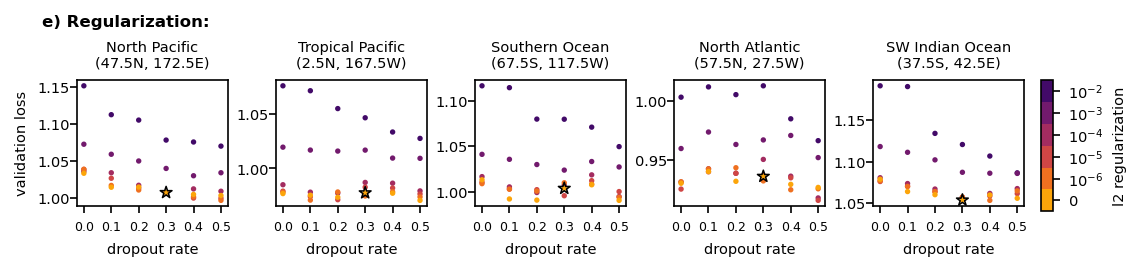

In [23]:
fig, axes = plt.subplots(1, 5, figsize = (7.7, 1.75))

for i, df in enumerate(kt_reg_results):
    p = axes[i].scatter(df.loc[df.activity_reg < 0.1].dropout_rate, df.loc[df.activity_reg < 0.1].score, 
                        marker = "o", s = 2.5, c = df.loc[df.activity_reg < 0.1].activity_reg.astype('category').cat.codes, cmap = inferno)
    axes[i].set_title(location_labels[i], size = 7)
    axes[i].tick_params(axis='y', which='major', pad=0)
    axes[i].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    axes[i].set(xlabel = "dropout rate")
    axes[i].scatter(df.loc[(df.activity_reg == reg_choice) & (df.dropout_rate == dropout_choice)].dropout_rate, 
             df.loc[(df.activity_reg == reg_choice) & (df.dropout_rate == dropout_choice)].score, edgecolors = "black", 
                    s = 35, marker = "*", zorder=10, facecolors="none", linewidth = 0.75)
    if i == 0:
        axes[i].set(ylabel = "validation loss")
        
plt.subplots_adjust(wspace=0.32, top = 0.7, bottom = 0.22, left = 0.08, right = 0.9)
plt.suptitle("e) Regularization:", y = 0.95, x = 0.05, ha = "left", size = 8, fontweight="bold")

cbaxes = fig.add_axes([0.915, 0.2, 0.01, 0.5])
cbar = fig.colorbar(p, cax = cbaxes)
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_yticks(np.arange((0.5)/1.2, 6/1.2, 1/1.2), ['$0$',"$10^{-6}$","$10^{-5}$","$10^{-4}$", "$10^{-3}$", "$10^{-2}$"], size = 7)
cbar.ax.set_ylabel('l2 regularization', rotation=90)
plt.savefig("../figures/Fig_S1e_hp_tuning_reg.pdf")